In [1]:
%autosave 0
from __future__ import absolute_import, division, print_function

Autosave disabled


# 2-D Discrete Fourier Transform 

In [2]:
%pylab inline
import cv2
import PIL

Populating the interactive namespace from numpy and matplotlib


In [3]:
img = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

In [4]:
fft = np.fft.fftshift(np.fft.fft2(img))
magnitude_spectrum = 20 * np.log(1 + np.abs(fft))

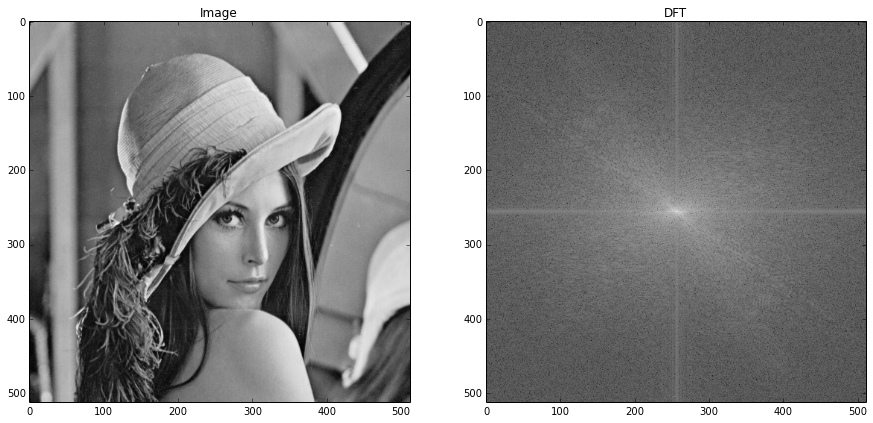

In [5]:
figure(figsize(15, 7))
plt.subplot(1,2,1), plt.imshow(img, 'gray'), plt.title("Image")
plt.subplot(1,2,2), plt.imshow(magnitude_spectrum, 'gray'), plt.title("DFT");

## Gaussian smoothing in x direction

In [6]:
img_smoothed = cv2.GaussianBlur(img, (17, 1), 3)

In [7]:
fft_smoothed = np.fft.fftshift(np.fft.fft2(img_smoothed))
magnitude_spectrum_smoothed = 20 * np.log(1 + np.abs(fft_smoothed))

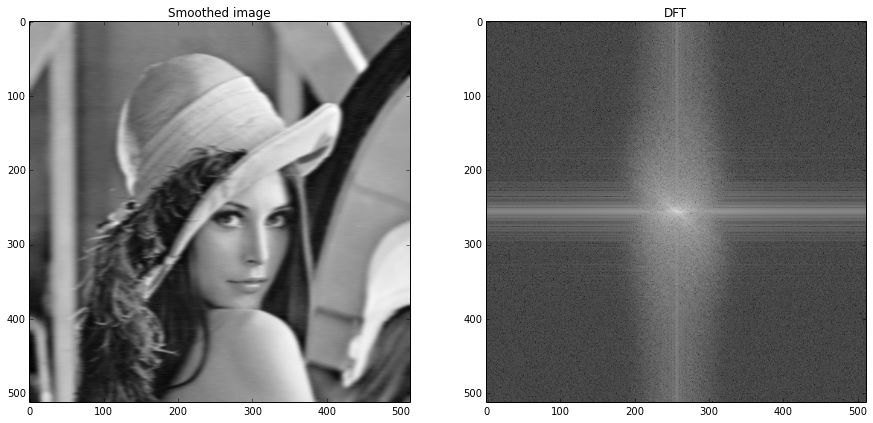

In [8]:
figure(figsize(15, 7))
plt.subplot(1,2,1), plt.imshow(img_smoothed, 'gray'), plt.title("Smoothed image")
plt.subplot(1,2,2), plt.imshow(magnitude_spectrum_smoothed, 'gray'), plt.title("DFT");

## Moving average filter in x direction

In [9]:
img_blurred = cv2.blur(img, (10, 1))

In [10]:
fft_blurred = np.fft.fftshift(np.fft.fft2(img_blurred))
magnitude_spectrum_blurred = 20 * np.log(1 + np.abs(fft_blurred))

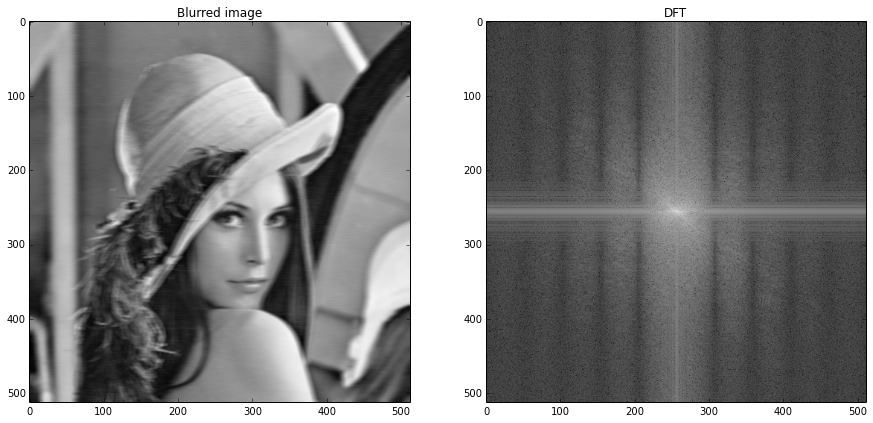

In [11]:
figure(figsize(15, 7))
plt.subplot(1,2,1), plt.imshow(img_blurred, 'gray'), plt.title("Blurred image")
plt.subplot(1,2,2), plt.imshow(magnitude_spectrum_blurred, 'gray'), plt.title("DFT");

## Setting high frequency components to zero

### Setting 75% of the coefficients to zero

In [12]:
fft_filtered1 = np.copy(fft)
fft_filtered1[:,384:] = 0
fft_filtered1[:,:128] = 0
fft_filtered1[384:,:] = 0
fft_filtered1[:128,:] = 0
magnitude_spectrum1 = 20 * np.log(1 + np.abs(fft_filtered1))
img_backtransformed1 = np.fft.ifft2(np.fft.fftshift(fft_filtered1)).real
img_backtransformed1 = img_backtransformed1.astype(uint8)

#### Sanity check

In [13]:
zeros = numpy.count_nonzero(fft_filtered1 == 0)
total = fft_filtered1.size
print("{0}% of the Fourier coefficients set to zero".format(100*zeros/total))

75.0% of the Fourier coefficients set to zero


### Setting 93.75% of the coefficients to zero

In [14]:
fft_filtered2 = np.copy(fft)
fft_filtered2[:,320:] = 0
fft_filtered2[:,:192] = 0
fft_filtered2[320:,:] = 0
fft_filtered2[:192,:] = 0
magnitude_spectrum2 = 20 * np.log(1 + np.abs(fft_filtered2))
img_backtransformed2 = np.fft.ifft2(np.fft.fftshift(fft_filtered2)).real
img_backtransformed2 = img_backtransformed2.astype(uint8)

#### Sanity check

In [15]:
zeros = numpy.count_nonzero(fft_filtered2 == 0)
total = fft_filtered2.size
print("{0}% of the Fourier coefficients set to zero".format(100*zeros/total))

93.75% of the Fourier coefficients set to zero


### Plotting

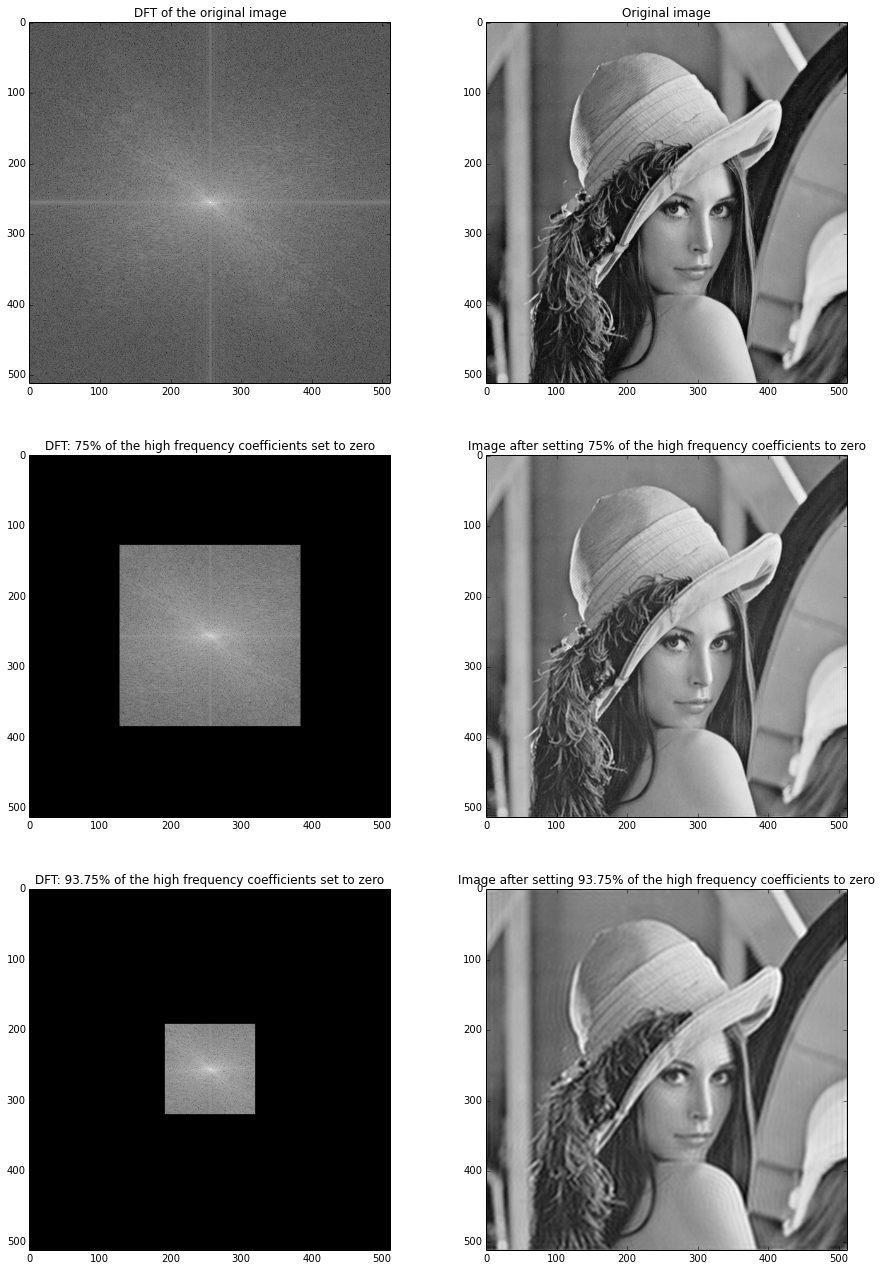

In [16]:
fig = figure(figsize(15, 22))
plt.subplot(3,2,1), plt.imshow(magnitude_spectrum, 'gray')
plt.title("DFT of the original image")
plt.subplot(3,2,2), plt.imshow(img, 'gray')
plt.title("Original image")
plt.subplot(3,2,3), plt.imshow(magnitude_spectrum1, 'gray')
plt.title("DFT: 75% of the high frequency coefficients set to zero")
plt.subplot(3,2,4), plt.imshow(img_backtransformed1, 'gray')
plt.title("Image after setting 75% of the high frequency coefficients to zero")
plt.subplot(3,2,5), plt.imshow(magnitude_spectrum2, 'gray')
plt.title("DFT: 93.75% of the high frequency coefficients set to zero")
plt.subplot(3,2,6), plt.imshow(img_backtransformed2, 'gray')
plt.title("Image after setting 93.75% of the high frequency coefficients to zero");

### Showing the differences between the filtered image and the original image

In [17]:
diff1 = 1.0 * img - img_backtransformed1
diff2 = 1.0 * img - img_backtransformed2

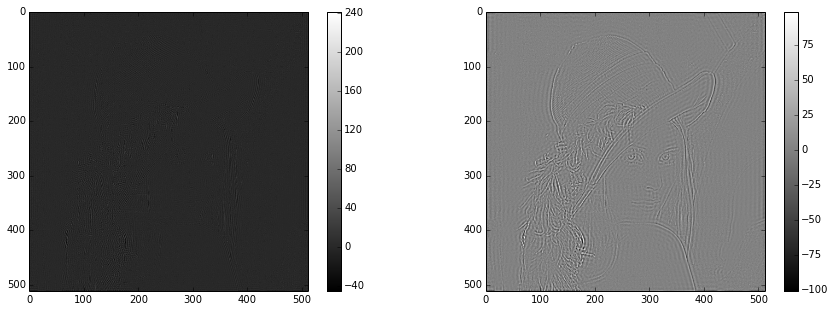

In [18]:
figure(figsize(15,5))
plt.subplot(1,2,1), plt.imshow(diff1, 'gray'), plt.colorbar();
plt.subplot(1,2,2), plt.imshow(diff2, 'gray'), plt.colorbar();

In [19]:
PIL.Image.fromarray(img).save('lena_gray.png')
PIL.Image.fromarray(img_backtransformed1).save('lena_zero_high_frequencies1.png')
PIL.Image.fromarray(img_backtransformed2).save('lena_zero_high_frequencies2.png')

## Comparison with a moving average filter

In [20]:
img_box_filter1 = cv2.blur(img, (2, 2))
img_box_filter2 = cv2.blur(img, (4, 4))

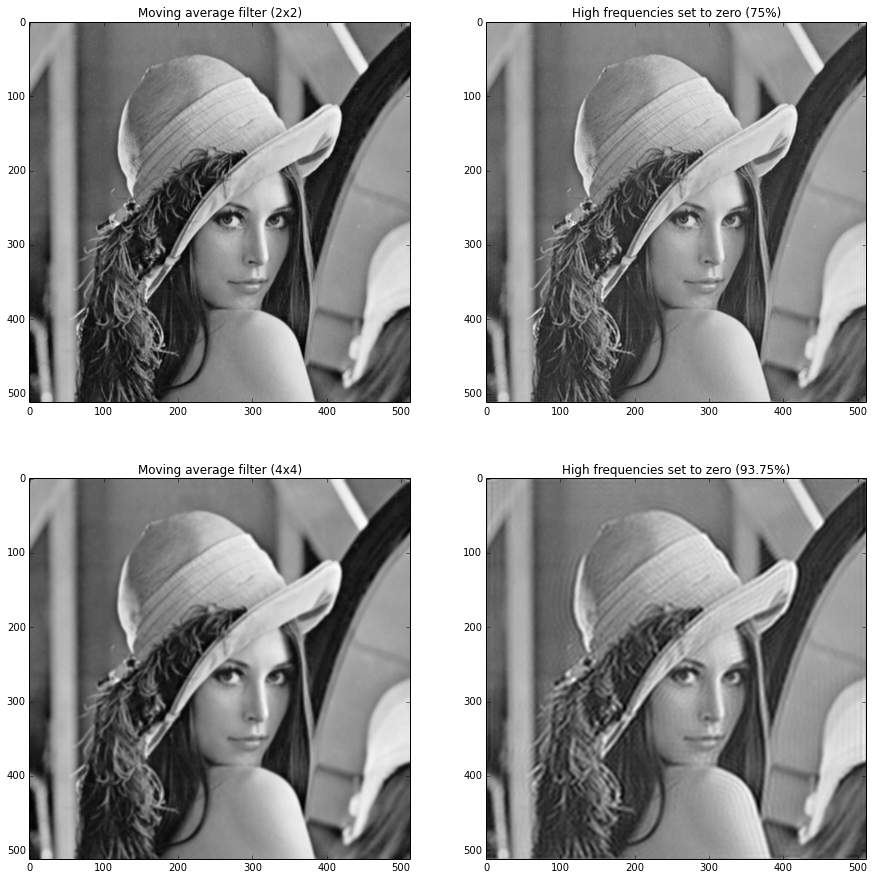

In [21]:
fig = figure(figsize(15, 15))
plt.subplot(2,2,1), plt.imshow(img_box_filter1, 'gray'), plt.title("Moving average filter (2x2)");
plt.subplot(2,2,2), plt.imshow(img_backtransformed1, 'gray'), plt.title("High frequencies set to zero (75%)");
plt.subplot(2,2,3), plt.imshow(img_box_filter2, 'gray'), plt.title("Moving average filter (4x4)");
plt.subplot(2,2,4), plt.imshow(img_backtransformed2, 'gray'), plt.title("High frequencies set to zero (93.75%)");

In [24]:
PIL.Image.fromarray(img_box_filter1).save('lena_blurred1.png')
PIL.Image.fromarray(img_box_filter2).save('lena_blurred2.png')